In [2]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

#### Series
- 1次元データ

In [2]:
ser = pd.Series([10, 20, 30, 40])
ser

0    10
1    20
2    30
3    40
dtype: int64

#### DataFrame
- 2次元データ

In [3]:
df = pd.DataFrame([[10, "a", True],
                   [20, "b", False],
                   [30, "c", True],
                   [40, "d", False]
                   ])
df

,0,1,2
0,10,a,True
1,20,b,False
2,30,c,True
3,40,d,False


In [4]:
df = pd.DataFrame(np.arange(100).reshape(25, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35
9,36,37,38,39


In [5]:
# 先頭5行出力
df.head()

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [6]:
# 末尾5行を出力
df.tail()

,0,1,2,3
20,80,81,82,83
21,84,85,86,87
22,88,89,90,91
23,92,93,94,95
24,96,97,98,99


In [7]:
# 形式の表示
df.shape

(25, 4)

In [8]:
df = pd.DataFrame(np.arange(6).reshape((3,2)))
df.index = ["01","02","03"] # type: ignore
df.columns = ["A", "B"]
display(df)

# 一括で作成した方が良い
dff = pd.DataFrame(np.arange(6).reshape((3,2)), columns=["A", "B"], index=["no1", "no2", "no3"])
display(dff)

# 辞書形式からのデータフレーム作成
dfff = pd.DataFrame({"A列":[0,2,4], "B列":[2,4,6]})
dfff

,A,B
01,0,1
02,2,3
03,4,5


,A,B
no1,0,1
no2,2,3
no3,4,5


,A列,B列
0,0,2
1,2,4
2,4,6


In [9]:
# 要素の抽出
display(df)
display(df["A"])
display(df[["A", "B"]])
display(df[:2])


,A,B
01,0,1
02,2,3
03,4,5


01    0
02    2
03    4
Name: A, dtype: int64

,A,B
01,0,1
02,2,3
03,4,5


,A,B
01,0,1
02,2,3


#### データフレームデータの抽出
- loc
    - インデックス名, カラム名を指定する
- iloc
    - index番号, カラム番号を指定する

In [10]:
# 全抽出
display(df.loc[:, :])
# 列だけを指定
display(df.loc[:, "A"])
# 列を複数指定
display(df.loc[:, ["A", "B"]])
# 行名を指定
display(df.loc["01", :])
# 行名を複数指定
display(df.loc[["01","03"],:])
# 行名、列名両方指定
display(df.loc[["01","03"],:"A"])

,A,B
01,0,1
02,2,3
03,4,5


01    0
02    2
03    4
Name: A, dtype: int64

,A,B
01,0,1
02,2,3
03,4,5


A    0
B    1
Name: 01, dtype: int64

,A,B
01,0,1
03,4,5


,A
01,0
03,4


In [11]:
# 2行目2列目の要素を抽出
display(df.iloc[1,1])
# 2行目以降、2列目の要素を抽出
display(df.iloc[1:, 1])
# 2行目以降, 2列目までの要素を抽出
display(df.iloc[1:, :2])

3

02    3
03    5
Name: B, dtype: int64

,A,B
02,2,3
03,4,5


#### データの読み込み、書き込み

In [12]:
# csvの読み込み
df = pd.read_csv("./data/202204health.csv", encoding="utf-8")
display(df.head())
# excelの読み込み
df2 = pd.read_excel("./data/202204health.xlsx")
display(df2.head())
# webサイト乗にあるテーブル情報の読み込み
url = "https://race.netkeiba.com/race/shutuba.html?race_id=202405021101&rf=race_submenu"
html = requests.get(url, timeout=10)
html.encoding = "EUC-JP"
tables = pd.read_html(StringIO(html.text))
# webサイト乗に存在するテーブルの数を表示
print(len(tables))
df3 = tables[0]
display(df3.head())

,日付,歩数,摂取カロリー
0,2022-04-01,5439,2500
1,2022-04-02,2510,2300
2,2022-04-03,10238,1950
3,2022-04-04,8209,1850
4,2022-04-05,9434,1930


,日付,歩数,摂取カロリー
0,2022-04-01,5439,2500
1,2022-04-02,2510,2300
2,2022-04-03,10238,1950
3,2022-04-04,8209,1850
4,2022-04-05,9434,1930


3


枠 馬 番   印         馬名  性齢    斤量   騎手     厩舎 馬体重 (増減) Unnamed: 9_level_0  人気  \
   枠 馬 番   印         馬名  性齢    斤量   騎手     厩舎 馬体重 (増減) Unnamed: 9_level_1  人気   
0  1   1 NaN   オレンジブルボン  牡3  57.0   石川   美浦武市  472(-8)              ---.-  **   
1  1   2 NaN  ゴールウェイガール  牝3  55.0   丹内  美浦伊藤大  404(+2)              ---.-  **   
2  2   3 NaN   ニシノヤングマン  牡3  57.0  横山武   美浦村田  450(-8)              ---.-  **   
3  2   4 NaN      ミューシグ  牝3  55.0    黛   美浦南田  468(+4)              ---.-  **   
4  3   5 NaN   ハニーディライト  牝3  54.0    原  美浦田中剛  424(-8)              ---.-  **   

  お気に入り馬      
      登録  メモ  
0    NaN NaN  
1    NaN NaN  
2    NaN NaN  
3    NaN NaN  
4    NaN NaN

In [13]:
# データの書き出し
df3.to_csv("./data/hoge.csv")
# excecl形式での書き出し
df3.to_excel("./data/hoge.xlsx")
# python pickleオブジェクトでの読み書きも可能　ここでは割愛

#### データ整形

In [14]:
df = pd.read_excel("./data/202204health.xlsx")
display(df.head())
# 歩数で抽出 True Falseが出る
display(df.loc[:, "歩数"]>=10000)
select_df = df.loc[df.loc[:, "歩数"]>=10000, :]
display(select_df.head())
print(select_df.shape)

# queryメソッドを利用して抽出する方法
select_df2 = df.query("歩数 >= 10000 and 摂取カロリー <= 1800")
display(select_df2.head())
# この時点では日数はobject型になっている, 摂取カロリーはint型になっている
print(select_df2.dtypes)




,日付,歩数,摂取カロリー
0,2022-04-01,5439,2500
1,2022-04-02,2510,2300
2,2022-04-03,10238,1950
3,2022-04-04,8209,1850
4,2022-04-05,9434,1930


0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: 歩数, dtype: bool

,日付,歩数,摂取カロリー
2,2022-04-03,10238,1950
8,2022-04-09,12045,1950
12,2022-04-13,10287,1800
19,2022-04-20,15328,1800
20,2022-04-21,12849,1940


(5, 3)


,日付,歩数,摂取カロリー
12,2022-04-13,10287,1800
19,2022-04-20,15328,1800


日付        object
歩数         int64
摂取カロリー     int64
dtype: object


In [15]:
# 列の追加
df.loc[:, "date"] = df.loc[:, "日付"].apply(pd.to_datetime)
# 型の変換
df.loc[:, "摂取カロリー"] = df.loc[:,"摂取カロリー"].astype(np.float32)
# index名の変更 特定の列の要素をindexに置き換えることが可能　index名を列名に持ってくることもできる
df = df.set_index("date")
print(df.dtypes)
df.head()

日付        object
歩数         int64
摂取カロリー     int64
dtype: object


,日付,歩数,摂取カロリー
date,,,
2022-04-01,2022-04-01,5439,2500
2022-04-02,2022-04-02,2510,2300
2022-04-03,2022-04-03,10238,1950
2022-04-04,2022-04-04,8209,1850
2022-04-05,2022-04-05,9434,1930


In [16]:
# 並べ替え
df = df.sort_values(by="歩数")
display(df.head())
# 降順
df = df.sort_values(by="歩数", ascending=False)
display(df.head())

,日付,歩数,摂取カロリー
date,,,
2022-04-02,2022-04-02,2510,2300
2022-04-23,2022-04-23,3890,1950
2022-04-22,2022-04-22,4029,2300
2022-04-30,2022-04-30,4093,1950
2022-04-08,2022-04-08,4873,2300


,日付,歩数,摂取カロリー
date,,,
2022-04-20,2022-04-20,15328,1800
2022-04-21,2022-04-21,12849,1940
2022-04-09,2022-04-09,12045,1950
2022-04-13,2022-04-13,10287,1800
2022-04-03,2022-04-03,10238,1950


In [17]:
# 不要カラムの削除
df = df.drop("日付", axis=1)
df.tail()

,歩数,摂取カロリー
date,,
2022-04-08,4873,2300
2022-04-30,4093,1950
2022-04-22,4029,2300
2022-04-23,3890,1950
2022-04-02,2510,2300


In [18]:
# 計算結果の列追加 
df.loc[:, "歩数/カロリー"] = (df.loc[:, "歩数"]/df.loc[:, "摂取カロリー"])
df.head()

,歩数,摂取カロリー,歩数/カロリー
date,,,
2022-04-20,15328,1800,8.515556
2022-04-21,12849,1940,6.623196
2022-04-09,12045,1950,6.176923
2022-04-13,10287,1800,5.715000
2022-04-03,10238,1950,5.250256


In [19]:
# 関数の適用などもできる
def exercise_judge(ex):
    if ex <= 3.0:
        return "Low"
    elif 3.0 < ex <= 6.0:
        return "Mid"
    else:
        return "High"

# 関数の適用も可能
df.loc[:, "運動指数"] = df.loc[:, "歩数/カロリー"].apply(exercise_judge)
df.head()

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2022-04-20,15328,1800,8.515556,High
2022-04-21,12849,1940,6.623196,High
2022-04-09,12045,1950,6.176923,High
2022-04-13,10287,1800,5.715000,Mid
2022-04-03,10238,1950,5.250256,Mid


In [20]:
# pickel形式で保存
df.to_pickle("./data/df_202204health.pickle")

In [21]:
# 特定の列の値で分割したカラムを生成し、、該当箇所に1, 日該当箇所に0を入れる
df_moved = pd.get_dummies(df.loc[:, "運動指数"], prefix="運動", dtype="uint8")
df_moved.to_pickle("./data/202204moved.pickle")
df_moved.head()

,運動_High,運動_Low,運動_Mid
date,,,
2022-04-20,1,0,0
2022-04-21,1,0,0
2022-04-09,1,0,0
2022-04-13,0,0,1
2022-04-03,0,0,1


### 日付データを扱う

In [22]:
dates = pd.date_range(start="2022-04-01", end="2022-04-30")
dates

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', freq='D')

In [23]:
rng = np.random.default_rng(123)
df = pd.DataFrame(rng.integers(1,31, size=30), index=dates, columns=["乱数"])
df.head()

,乱数
2022-04-01,1
2022-04-02,21
2022-04-03,18
2022-04-04,2
2022-04-05,28


In [24]:
# 1年分のデータを作成してみる
dates = pd.date_range(start="2022-01-01", periods=365)
# 乱数を作成
df = pd.DataFrame(rng.integers(1,31, size=365), index=dates, columns=["乱数"])
df.head()

,乱数
2022-01-01,5
2022-01-02,19
2022-01-03,14
2022-01-04,28
2022-01-05,23


In [25]:
# 月平均を出してみる
# Grouperは周期的なデータを集計可能　freqを指定することで、日時、
display(df.groupby(pd.Grouper(freq="M")).mean())
# MEをresampleも上記同様に集計に向いている 
display(df.loc[:, "乱数"].resample("ME").mean())

/var/folders/17/mtb1r9zn3xq7qsb6zy36_1b40000gn/T/ipykernel_87333/394828655.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  display(df.groupby(pd.Grouper(freq="M")).mean())


,乱数
2022-01-31,12.935484
2022-02-28,17.285714
2022-03-31,12.709677
2022-04-30,16.233333
2022-05-31,14.645161
2022-06-30,13.966667
2022-07-31,16.451613
2022-08-31,13.193548
2022-09-30,13.566667
2022-10-31,14.193548


2022-01-31    12.935484
2022-02-28    17.285714
2022-03-31    12.709677
2022-04-30    16.233333
2022-05-31    14.645161
2022-06-30    13.966667
2022-07-31    16.451613
2022-08-31    13.193548
2022-09-30    13.566667
2022-10-31    14.193548
2022-11-30    17.566667
2022-12-31    18.290323
Freq: ME, Name: 乱数, dtype: float64

In [26]:
# 複雑な条件のインデックス
# W-SAT 週で集計し、SAT：土曜日単位
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq="W-SAT")).sum(), columns=["乱数"])
df_year.head()

,乱数
2022-01-01,5
2022-01-08,141
2022-01-15,68
2022-01-22,65
2022-01-29,87


### 欠損値の処理

In [27]:
df_202205 = pd.read_csv("./data/202205health.csv", encoding='utf-8', index_col="日付", parse_dates=True)
df_202205.head()

,歩数,摂取カロリー
日付,,
2022-05-01,1439.0,4500.0
2022-05-02,8120.0,2420.0
2022-05-03,NaN,NaN
2022-05-04,2329.0,1500.0
2022-05-05,NaN,NaN


In [28]:
# 欠損値を削除
df_drop = df_202205.dropna()
df_drop.head()

,歩数,摂取カロリー
日付,,
2022-05-01,1439.0,4500.0
2022-05-02,8120.0,2420.0
2022-05-04,2329.0,1500.0
2022-05-06,3233.0,1800.0
2022-05-07,9593.0,2200.0


In [29]:
# 欠損値を穴埋め
df_ffill = df_202205.ffill() # 欠損値の前の値を入れる
display(df_ffill)
df_bfill = df_202205.bfill() # 欠損値の後ろの値を入れる
display(df_bfill)
# 欠損値を特定の値で埋める(median()は中央値、mode().iloc[0,:]で最頻値)
df_fillmean = df_202205.fillna(df_202205.mean())
display(df_fillmean)


,歩数,摂取カロリー
日付,,
2022-05-01,1439.0,4500.0
2022-05-02,8120.0,2420.0
2022-05-03,8120.0,2420.0
2022-05-04,2329.0,1500.0
2022-05-05,2329.0,1500.0
2022-05-06,3233.0,1800.0
2022-05-07,9593.0,2200.0
2022-05-08,9213.0,1800.0
2022-05-09,5593.0,2500.0


,歩数,摂取カロリー
日付,,
2022-05-01,1439.0,4500.0
2022-05-02,8120.0,2420.0
2022-05-03,2329.0,1500.0
2022-05-04,2329.0,1500.0
2022-05-05,3233.0,1800.0
2022-05-06,3233.0,1800.0
2022-05-07,9593.0,2200.0
2022-05-08,9213.0,1800.0
2022-05-09,5593.0,2500.0


,歩数,摂取カロリー
日付,,
2022-05-01,1439.000000,4500.000000
2022-05-02,8120.000000,2420.000000
2022-05-03,5645.714286,2388.571429
2022-05-04,2329.000000,1500.000000
2022-05-05,5645.714286,2388.571429
2022-05-06,3233.000000,1800.000000
2022-05-07,9593.000000,2200.000000
2022-05-08,9213.000000,1800.000000
2022-05-09,5593.000000,2500.000000


### データフレームの連結

In [30]:
# pickelデータの読み込み
df = pd.read_pickle("./data/202204moved.pickle")
display(df.head())
df_moved = pd.read_pickle("./data/202204moved.pickle")
display(df_moved.head())


,運動_High,運動_Low,運動_Mid
date,,,
2022-04-20,1,0,0
2022-04-21,1,0,0
2022-04-09,1,0,0
2022-04-13,0,0,1
2022-04-03,0,0,1


,運動_High,運動_Low,運動_Mid
date,,,
2022-04-20,1,0,0
2022-04-21,1,0,0
2022-04-09,1,0,0
2022-04-13,0,0,1
2022-04-03,0,0,1


In [31]:
# 列方向への連結
df_merged = pd.concat([df, df_moved], axis=1)
display(df_merged.head())
# 行方向への連結
df_merged2 = pd.concat([df_drop, df_ffill], axis=0, sort=True)
df_merged2


,運動_High,運動_Low,運動_Mid,運動_High,運動_Low,運動_Mid
date,,,,,,
2022-04-20,1,0,0,1,0,0
2022-04-21,1,0,0,1,0,0
2022-04-09,1,0,0,1,0,0
2022-04-13,0,0,1,0,0,1
2022-04-03,0,0,1,0,0,1


,摂取カロリー,歩数
日付,,
2022-05-01,4500.0,1439.0
2022-05-02,2420.0,8120.0
2022-05-04,1500.0,2329.0
2022-05-06,1800.0,3233.0
2022-05-07,2200.0,9593.0
2022-05-08,1800.0,9213.0
2022-05-09,2500.0,5593.0
2022-05-01,4500.0,1439.0
2022-05-02,2420.0,8120.0


### 統計データの扱い

In [32]:
df = pd.read_pickle("./data/df_202204health.pickle")
df.head()

,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,
2022-04-20,15328,1800,8.515556,High
2022-04-21,12849,1940,6.623196,High
2022-04-09,12045,1950,6.176923,High
2022-04-13,10287,1800,5.715000,Mid
2022-04-03,10238,1950,5.250256,Mid


In [33]:
# 最大値
print(df.loc[:, "摂取カロリー"].max())
# 最小値
print(df.loc[:, "摂取カロリー"].min())
# 平均値
print(df.loc[:, "摂取カロリー"].mean())
# 最頻値
print(df.loc[:, "摂取カロリー"].mode())
# 中央値
print(df.loc[:, "摂取カロリー"].median())
# 標準偏差
print(df.loc[:, "摂取カロリー"].std())
# 分散
print(df.loc[:, "摂取カロリー"].std(ddof=0))
# 摂取カロリーが2300以上の人を抽出
display(df.loc[df.loc[:, "摂取カロリー"]==2300, :].count())
display(df[df["摂取カロリー"]==2300].count())

2500
1800
2026.6666666666667
0    2300
Name: 摂取カロリー, dtype: int64
1945.0
205.5494459069245
202.09458731549992


歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

In [34]:
# 統計量をまとめて出す方法
df.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666667,3.929658
std,2689.269308,205.549446,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


In [40]:
# 相関係数を出す方法
dff = df.drop(columns=["運動指数"])
dff.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


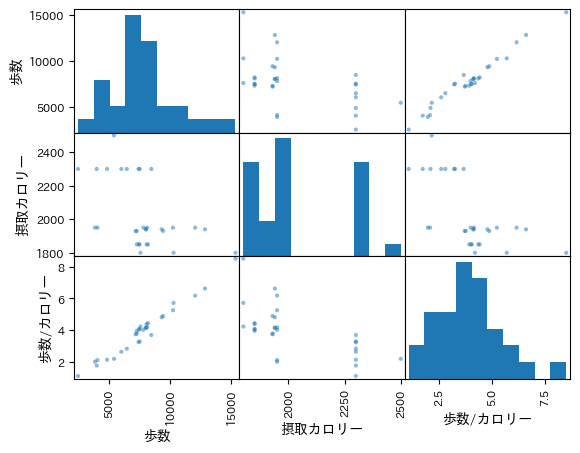

In [43]:
# 散布図行列
from pandas.plotting import scatter_matrix
import japanize_matplotlib


_ = scatter_matrix(dff)

In [47]:
# データの変換
dff = df.loc[:, ["歩数", "摂取カロリー"]]

dff_numpy = dff.values
dff_numpy


array([[15328,  1800],
       [12849,  1940],
       [12045,  1950],
       [10287,  1800],
       [10238,  1950],
       [ 9434,  1930],
       [ 9320,  1940],
       [ 8475,  2300],
       [ 8209,  1850],
       [ 8132,  1950],
       [ 8093,  1850],
       [ 8043,  1940],
       [ 8031,  1940],
       [ 7823,  1950],
       [ 7593,  1800],
       [ 7529,  2300],
       [ 7493,  1850],
       [ 7492,  1850],
       [ 7435,  2300],
       [ 7302,  1850],
       [ 7289,  1930],
       [ 7203,  1930],
       [ 6481,  2300],
       [ 6033,  2300],
       [ 5439,  2500],
       [ 4873,  2300],
       [ 4093,  1950],
       [ 4029,  2300],
       [ 3890,  1950],
       [ 2510,  2300]])